# Assigment 2

Juan Navarro, <jsnavarroa@unal.edu.co>

## 1. (2.5) Use the following code to generate a dataset

```python
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker=’o’, c=y, edgecolor=’k’)
```

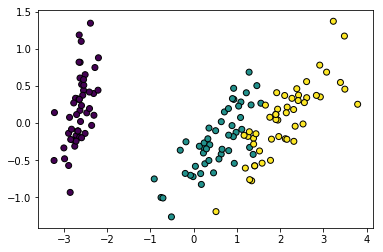

In [199]:
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.show()

### (a) Use the data for classes 1 and 2 to estimate the parameters of a bivariate Gaussian distribution for each class. Assume that the covariance matrix is the same for both classes. Write the parameters of the probability distribution functions for both classes.

In [200]:
import numpy as np

from sklearn.mixture import GaussianMixture

# Use only data from the 1 and 2 classes
ix = np.isin(y, [1, 2])
x12 = Xorig[ix]
y12 = y[ix]

# Try GMMs
def gmm(x, y, cov_type):
    n_classes = len(np.unique(y))
    estimators = GaussianMixture(n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0)

    estimators.fit(x, y)
    
    print("Means \n", estimators.means_) 
    print("Variances \n", np.diagonal(estimators.covariances_))
    
    return estimators

estimators = gmm(x12, y12, 'tied')

Means 
 [[6.01326724 2.81153998 4.37801991 1.35698388]
 [6.54591121 2.94101092 5.50865268 2.0401348 ]]
Variances 
 [0.36433898 0.1054446  0.35657639 0.06246013]


### (b) Write a Python function that calculates the discriminant function for each class.

In [201]:
def discriminant(x, classes, estimator):
    # we use the 0/1 loss function
    # g_i (x) = P (C_i |x)
    return classes[estimator.predict(x)]

discriminant(x12[0:3], np.unique(y12), estimators)

array([1, 1, 1])

### (c) Draw a plot, where the regions corresponding to the different classes are shown with different colors. A region corresponding to a class is the set of points where the particular class discriminant function is maximum (decision regions, [Alp10] Sect. 3.4).

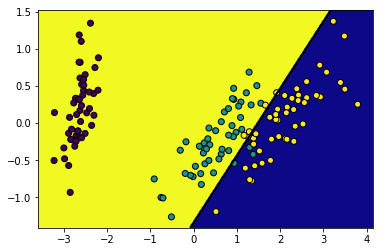

In [202]:
def plot(discriminant, estimator):
    
    pca = PCA(n_components=2)
    X = pca.fit_transform(Xorig)
    
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
    
    # Create a mesh
    nx, ny = 400, 400
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    mesh = np.c_[xx.ravel(), yy.ravel()]

    meshOrig = pca.inverse_transform(mesh)

    Z = discriminant(meshOrig, np.unique(iris.target), estimator)
    
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z , cmap='plasma_r', alpha=0.7)

    plt.contour(xx, yy, Z, [0.5], linewidths=2, colors='k')

    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

    plt.show()
    
plot(discriminant, estimators)

### (d) The boundary between both class regions must be a line. Calculate the equation of this line clearly explaining the deduction process. Draw the line along with the regions.

### (e) What happens with the boundary line if we change the prior probabilities of the classes? Illustrate with a graphical example.

## 2. (1.0) Repeat steps (a) to (c) from previous item, but this time:

### (a) Use data from the three classes.

Means 
 [[5.006      3.418      1.464      0.244     ]
 [6.59321546 2.99662454 5.55302582 2.05120427]
 [5.95691759 2.75720839 4.31002481 1.33039951]]
Variances 
 [0.26319433 0.11096643 0.20260411 0.03639115]


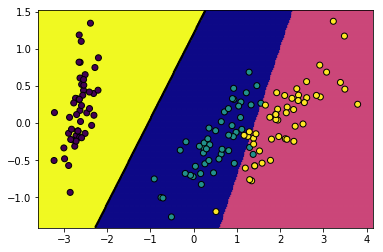

In [203]:
estimators2 = gmm(Xorig, y, 'tied')

def discriminant2(x, classes, estimator):
    # we use the 0/1 loss function
    # g_i (x) = P (C_i |x)
    return classes[estimator.predict(x)]

plot(discriminant2, estimators2)

### (b) Estimate a different covariance matrix for each class.

Means 
 [[5.006      3.418      1.464      0.244     ]
 [6.54639415 2.94946365 5.48364578 1.98726565]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
Variances 
 [[0.121765   0.09223276 0.18547072]
 [0.098292   0.11040914 0.09103431]
 [0.015816   0.08385112 0.20235849]
 [0.010336   0.05574334 0.06171383]]


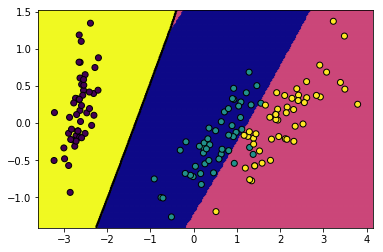

In [204]:
estimators2b = gmm(Xorig, y, 'full')

def discriminant2b(x, classes, estimator):
    # we use the 0/1 loss function
    # g_i (x) = P (C_i |x)
    return classes[estimator.predict(x)]

plot(discriminant2b, estimators2b)

## 3. (1.5) Repeat the previous item, but this time:

### (a) Use only a portion of the dataset (80% of the samples) to estimate the parameters of the probability distribution functions of each class.

In [205]:
from sklearn.model_selection import train_test_split

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(Xorig, y, test_size=0.2, random_state=1)

def gmm3(x, y, cov_type):
    n_classes = len(np.unique(y))
    estimators = GaussianMixture(n_components=n_classes+1, covariance_type=cov_type, max_iter=20, random_state=0)

    estimators.fit(x, y)
    
    print("Means \n", estimators.means_) 
    print("Variances \n", np.diagonal(estimators.covariances_))
    
    return estimators

estimators3 = gmm3(X_train, y_train, 'full')

Means 
 [[5.70760655 2.69484768 4.01862342 1.22804459]
 [4.96153846 3.35384615 1.46923077 0.23076923]
 [6.62174141 2.9994516  5.63878274 2.06031696]
 [6.30137701 2.77220817 4.80431499 1.60227237]]
Variances 
 [[ 0.16051679  0.08489152  0.29272265 -0.06210799]
 [ 0.0778564   0.13069134  0.03436825  0.00308073]
 [ 0.11828442  0.01345168  0.28764395  0.02870019]
 [ 0.03424937  0.0083432   0.04106748  0.04497375]]


### (b) Write a function that calculates the discriminant function for each class, taking into account the possibility of rejection with a cost λ and cost 1 for misclassification ([Alp10] Eq. (3.10)). Look for values of λ that produce a rejection region easily distinguishable from the other regions.

IndexError: index 3 is out of bounds for axis 1 with size 3

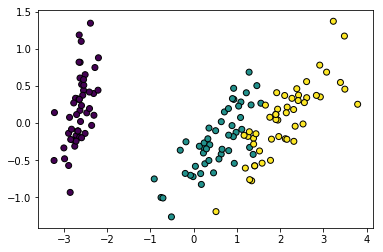

In [206]:
rejectCost = 0
def discriminant3(x, classes, estimator):
    # we use the 0/1 loss function
    # g_i (x) = P (C_i |x)
    proba = estimator.predict_proba(x)
    prediction = estimator.predict(x)
    
    return classes[estimator.predict(x)]

plot(discriminant3, estimators3)

### (c) Classify the rest of the dataset that was not used for estimation (20%), using a classifier based on the discriminant functions. Evaluate the results using a confusion matrix.